In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df  = pd.read_csv("E:\Intellipaat Class\Machine Learning\Case Study\KNN\Credit-Score-Dataset.csv")
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [3]:
df.tail()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High
163,49,Female,77500,Doctorate,Married,1,Owned,High


In [4]:
df.shape

(164, 8)

In [5]:
df.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [6]:
df.duplicated().sum()

62

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(102, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 134
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 102 non-null    int64 
 1   Gender              102 non-null    object
 2   Income              102 non-null    int64 
 3   Education           102 non-null    object
 4   Marital Status      102 non-null    object
 5   Number of Children  102 non-null    int64 
 6   Home Ownership      102 non-null    object
 7   Credit Score        102 non-null    object
dtypes: int64(3), object(5)
memory usage: 7.2+ KB


In [11]:
df.describe()

,Age,Income,Number of Children
count,102.000000,102.000000,102.000000
mean,38.950980,88308.823529,0.656863
std,8.709136,32417.071969,0.895479
min,25.000000,25000.000000,0.000000
25%,31.000000,65000.000000,0.000000
50%,39.000000,86250.000000,0.000000
75%,46.750000,110000.000000,1.000000
max,53.000000,162500.000000,3.000000


In [12]:
df_obj = df.select_dtypes('object').columns
df_obj

Index(['Gender', 'Education', 'Marital Status', 'Home Ownership',
       'Credit Score'],
      dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
for i in df_obj:
    le.fit(df[i])
    df[i] = le.transform(df[i])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 134
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 102 non-null    int64
 1   Gender              102 non-null    int32
 2   Income              102 non-null    int64
 3   Education           102 non-null    int32
 4   Marital Status      102 non-null    int32
 5   Number of Children  102 non-null    int64
 6   Home Ownership      102 non-null    int32
 7   Credit Score        102 non-null    int32
dtypes: int32(5), int64(3)
memory usage: 5.2 KB


In [16]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,0,50000,1,1,0,1,1
1,30,1,100000,4,0,2,0,1
2,35,0,75000,2,0,1,0,1
3,40,1,125000,3,1,0,0,1
4,45,0,100000,1,0,3,0,1


In [17]:
df.describe()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,38.950980,0.490196,88308.823529,2.068627,0.431373,0.656863,0.284314,0.852941
std,8.709136,0.502373,32417.071969,1.380628,0.497714,0.895479,0.453315,0.495466
min,25.000000,0.000000,25000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,65000.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,0.000000,86250.000000,2.000000,0.000000,0.000000,0.000000,1.000000
75%,46.750000,1.000000,110000.000000,3.000000,1.000000,1.000000,1.000000,1.000000
max,53.000000,1.000000,162500.000000,4.000000,1.000000,3.000000,1.000000,2.000000


In [18]:
list_f = df.columns
list_n = len(list_f)

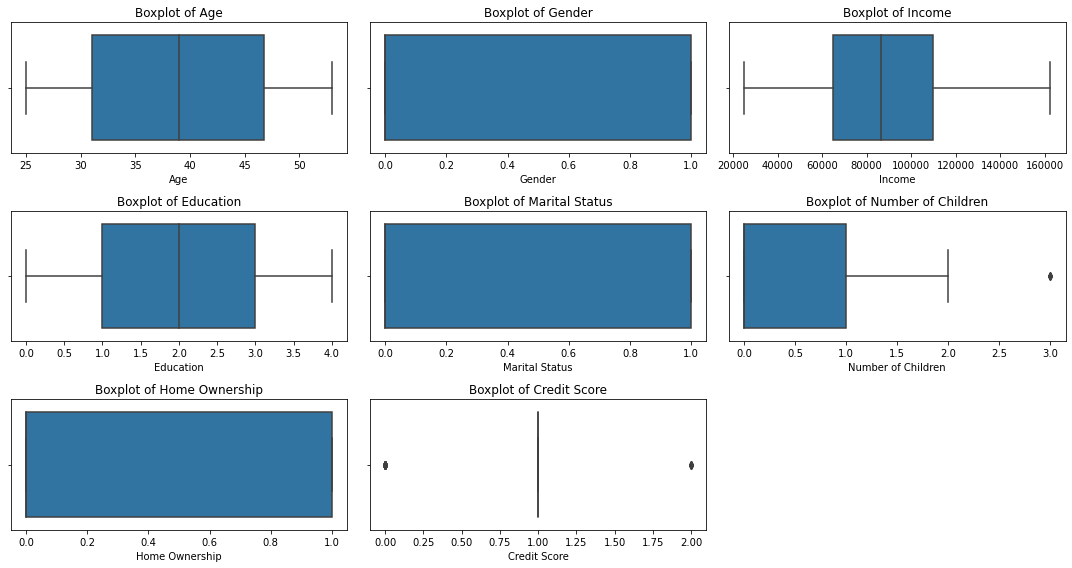

In [19]:
plt.figure(figsize=(15,8))
for i in range(list_n):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[list_f[i]], data=df)
    plt.title('Boxplot of {}'.format(list_f[i]))
    i = i+1
    plt.tight_layout()

In [20]:
df['Number of Children'].unique()

array([0, 2, 1, 3], dtype=int64)

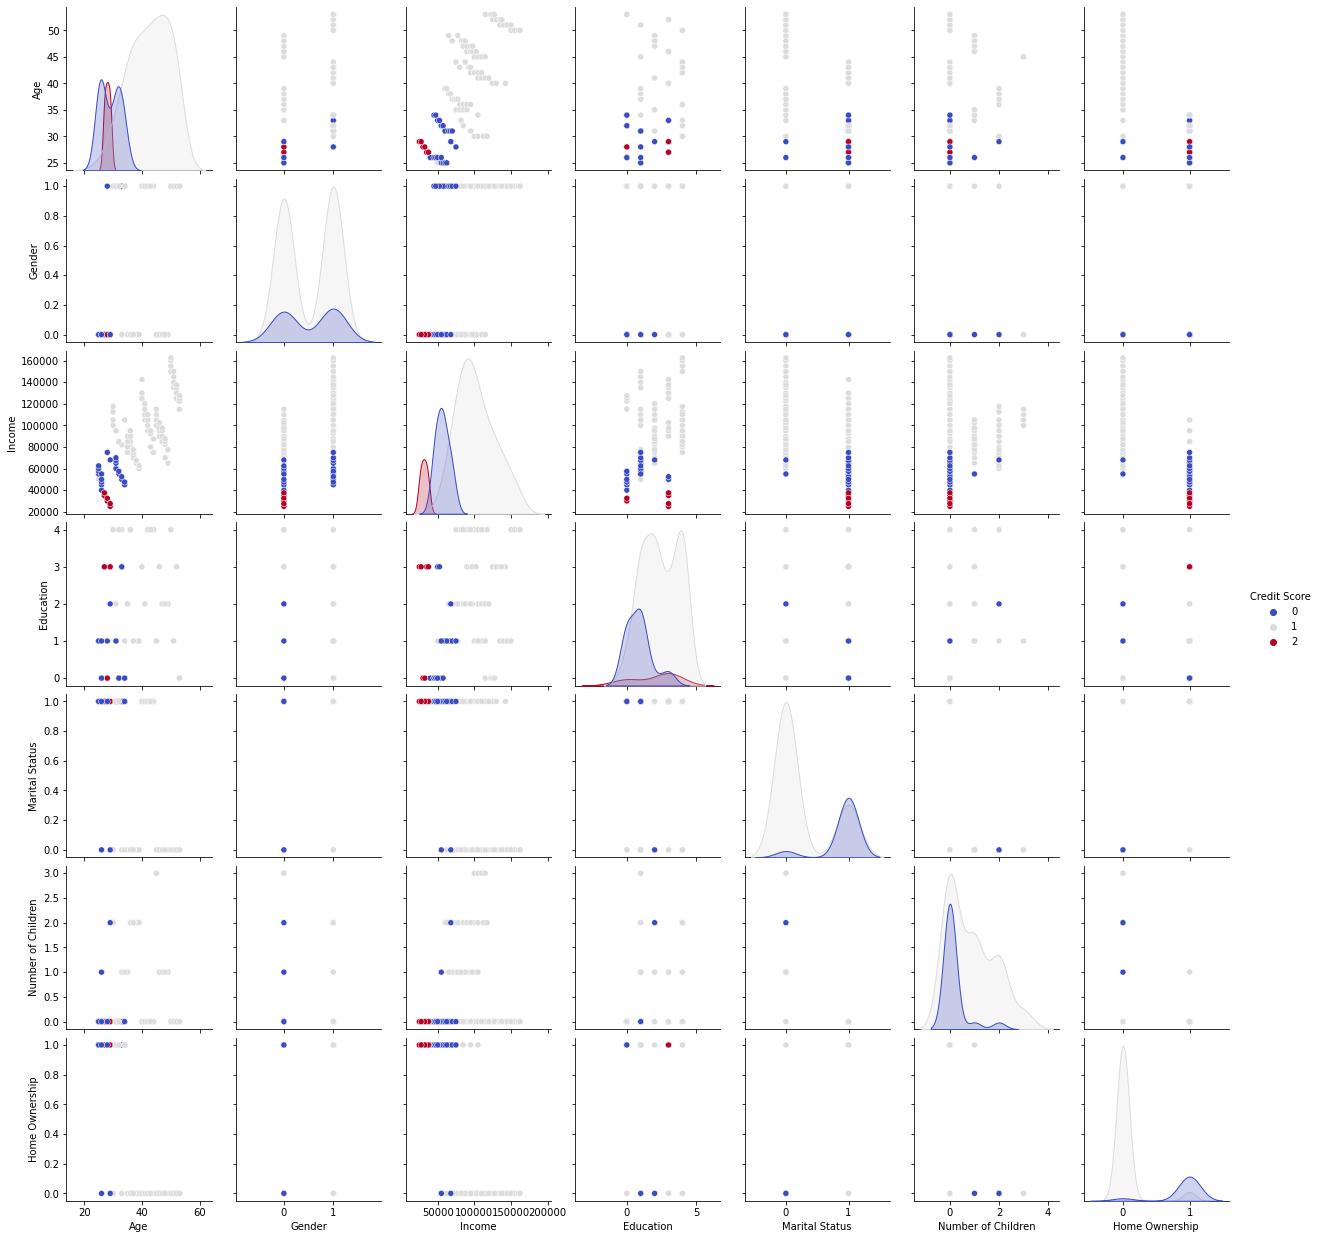

In [21]:
sns.pairplot(df,hue='Credit Score',palette='coolwarm')

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
df.corr()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
Age,1.000000,0.254473,0.731797,0.176497,-0.536416,0.019404,-0.716192,0.328722
Gender,0.254473,1.000000,0.518022,0.222242,0.294267,-0.524760,-0.009377,-0.145071
Income,0.731797,0.518022,1.000000,0.341973,-0.440659,-0.009786,-0.657560,0.201349
Education,0.176497,0.222242,0.341973,1.000000,-0.057917,0.027244,-0.395341,0.362275
Marital Status,-0.536416,0.294267,-0.440659,-0.057917,1.000000,-0.642053,0.679761,-0.262156
Number of Children,0.019404,-0.524760,-0.009786,0.027244,-0.642053,1.000000,-0.440227,0.152928
Home Ownership,-0.716192,-0.009377,-0.657560,-0.395341,0.679761,-0.440227,1.000000,-0.385073
Credit Score,0.328722,-0.145071,0.201349,0.362275,-0.262156,0.152928,-0.385073,1.000000


<AxesSubplot:>

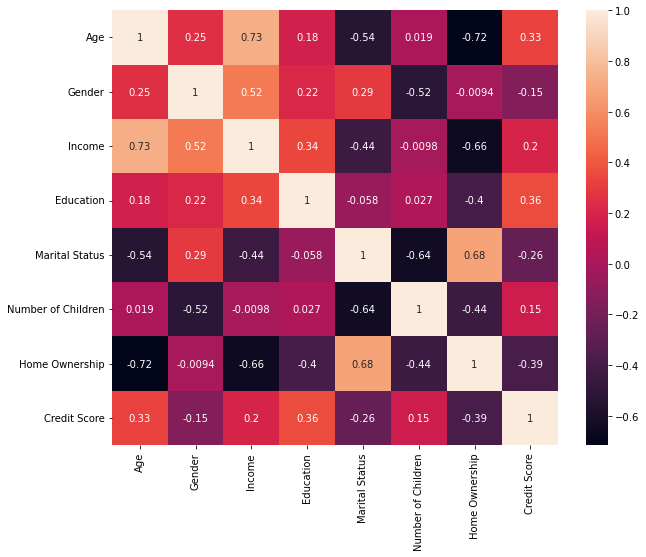

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = df.drop('Credit Score', axis=1)
y = df['Credit Score']

In [27]:
scaler = StandardScaler()

In [28]:
scaler.fit(X)

StandardScaler()

In [29]:
X = scaler.transform(X)

In [30]:
X

array([[-1.60978928, -0.98058068, -1.18758425, -0.77783759,  1.14812099,
        -0.73715445,  1.58658166],
       [-1.03284442,  1.0198039 ,  0.36242974,  1.40581656, -0.87098834,
         1.50731582, -0.63028587],
       [-0.45589956, -0.98058068, -0.41257725, -0.04995287, -0.87098834,
         0.38508068, -0.63028587],
       [ 0.12104529,  1.0198039 ,  1.13743674,  0.67793185,  1.14812099,
        -0.73715445, -0.63028587],
       [ 0.69799015, -0.98058068,  0.36242974, -0.77783759, -0.87098834,
         2.62955095, -0.63028587],
       [ 1.27493501,  1.0198039 ,  1.91244373,  1.40581656, -0.87098834,
        -0.73715445, -0.63028587],
       [-1.49440031, -0.98058068, -1.49758705, -1.50572231,  1.14812099,
        -0.73715445,  1.58658166],
       [-0.91745545,  1.0198039 , -0.87758145, -0.77783759,  1.14812099,
        -0.73715445,  1.58658166],
       [-0.34051059, -0.98058068, -0.25757585,  1.40581656, -0.87098834,
         1.50731582, -0.63028587],
       [ 0.23643426,  1.0198

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
KNN = KNeighborsClassifier()

In [34]:
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
y_pred = KNN.predict(X_test)

In [36]:
y_pred

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1])

In [37]:
from sklearn.metrics import classification_report, accuracy_score

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.67      0.50         6
           1       0.90      0.90      0.90        21
           2       0.00      0.00      0.00         4

    accuracy                           0.74        31
   macro avg       0.43      0.52      0.47        31
weighted avg       0.69      0.74      0.71        31



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
accuracy_score(y_test, y_pred)

0.7419354838709677

In [40]:
df['Credit Score'].value_counts()

1    75
0    21
2     6
Name: Credit Score, dtype: int64

In [41]:
KNN3 = KNeighborsClassifier(n_neighbors=3)
KNN3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
y_pred3 = KNN3.predict(X_test)

In [61]:
Acc_KNN = accuracy_score(y_test, y_pred3)
Acc_KNN

0.8064516129032258

In [44]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

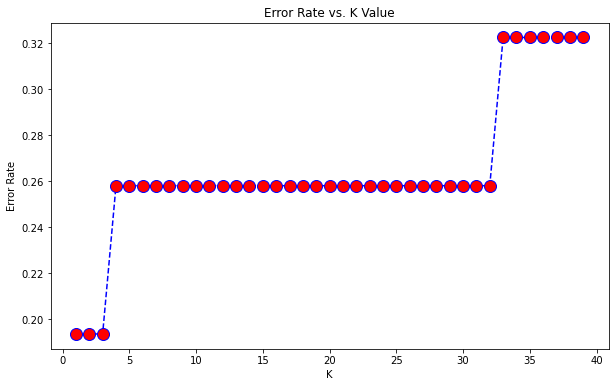

In [45]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=12)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [46]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    accuracy_rate.append(np.mean(pred_i == y_test))

Text(0, 0.5, 'Accuracy Rate')

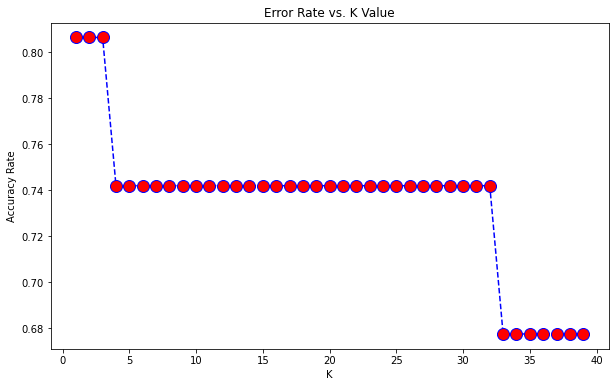

In [47]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=12)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [48]:
KNN10 = KNeighborsClassifier(n_neighbors=3)
KNN10.fit(X_train, y_train)
y_pred10 = KNN10.predict(X_test)
accuracy_score(y_test, y_pred10)

0.8064516129032258

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
DT_pred = DT.predict(X_test)
Acc_DT = accuracy_score(y_test, DT_pred)
Acc_DT

0.9032258064516129

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)
Acc_RF = accuracy_score(y_test, RF_pred)
Acc_RF

0.8064516129032258

In [53]:
from xgboost import XGBClassifier

In [58]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
Acc_xgb = accuracy_score(y_test, xgb_pred)
Acc_xgb

0.8387096774193549

In [59]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
Acc_lr = accuracy_score(y_test, lr_pred)
Acc_lr

0.8064516129032258

In [64]:
models = ['KNN', 'Decision Tree','Random Forest', 'XGBoost', 'Logistic Regression']
values = [Acc_KNN, Acc_DT, Acc_RF, Acc_xgb, Acc_lr]

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

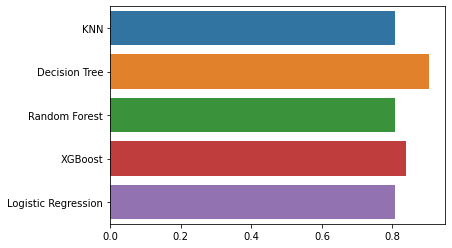

In [67]:
sns.barplot(values, models, orient='h')

In [69]:
compare_df = pd.DataFrame(data=[models,values]).T
compare_df

,0,1
0,KNN,0.806452
1,Decision Tree,0.903226
2,Random Forest,0.806452
3,XGBoost,0.83871
4,Logistic Regression,0.806452


In [71]:
compare_df.columns = ['Models', 'Accuarcy']
compare_df

,Models,Accuarcy
0,KNN,0.806452
1,Decision Tree,0.903226
2,Random Forest,0.806452
3,XGBoost,0.83871
4,Logistic Regression,0.806452


In [93]:
compare_df.sort_values('Accuarcy', ascending=False).reset_index(drop=True)

,Models,Accuarcy
0,Decision Tree,0.903226
1,XGBoost,0.83871
2,KNN,0.806452
3,Random Forest,0.806452
4,Logistic Regression,0.806452
